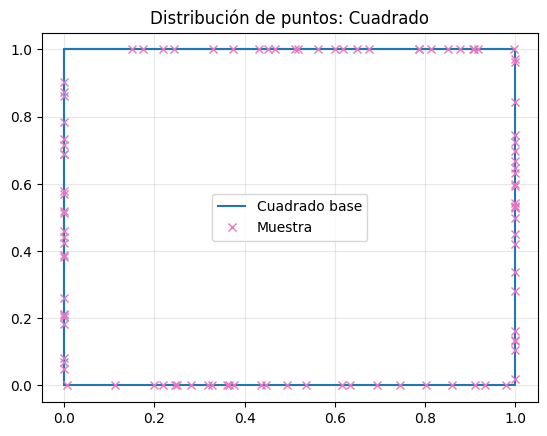

In [1]:
import math, random
import matplotlib.pyplot as plt
import numpy as np

# Muestreo de puntos sobre el cuadrado
x1 = [(0,np.random.rand()) for i in range(25)]
x2 = [(np.random.rand(),0) for i in range(25)]
x3 = [(1,np.random.rand()) for i in range(25)]
x4 = [(np.random.rand(),1) for i in range(25)]
full_muestra = x1+x2+x3+x4
full_x = [_[0] for _ in full_muestra]
full_y = [_[1] for _ in full_muestra]

# --------------------
# Cuadrado.
x = np.linspace(0,1,100)
y = np.zeros(100)

c1 = [(y[i], x[i]) for i in range(100)]
c2 = [(x[i], y[i]) for i in range(100)]
c3 = [(y[i] + 1, x[i]) for i in range(100)]
c4 = [(x[i], y[i] + 1) for i in range(100)]

full_cuad = c1+c2+c3+c4
cuad_x = [_[0] for _ in full_cuad]
cuad_y = [_[1] for _ in full_cuad]

fig, ax = plt.subplots()
ax.plot(cuad_x, cuad_y, color = 'tab:blue', label = 'Cuadrado base')
ax.plot(full_x, full_y, 'x', color = 'tab:pink', label = 'Muestra')
ax.grid(True, alpha = 0.3)
ax.legend()
ax.set_title('Distribución de puntos: Cuadrado')
plt.show()

In [2]:
def farthest_first_traversal(muestra):
    fft = []
    full_len = len(muestra)
    while len(fft) < full_len - 1:
        if len(fft) == 0:
            random.shuffle(muestra)
            current_value = muestra.pop()
        else:
            current_value = fft[-1]
        max_dist = 0
        biggest_index = None

        for i in range(len(muestra)):
            dist = np.linalg.norm(np.array(current_value) - np.array(muestra[i]))
            if dist > max_dist:
                max_dist = dist
                biggest_index = i
        fft.append(muestra[biggest_index])
        muestra.pop(biggest_index)
    return fft

In [3]:
fft_square = farthest_first_traversal(full_muestra)
fft_x = [_[0] for _ in fft_square]
fft_y = [_[1] for _ in fft_square]

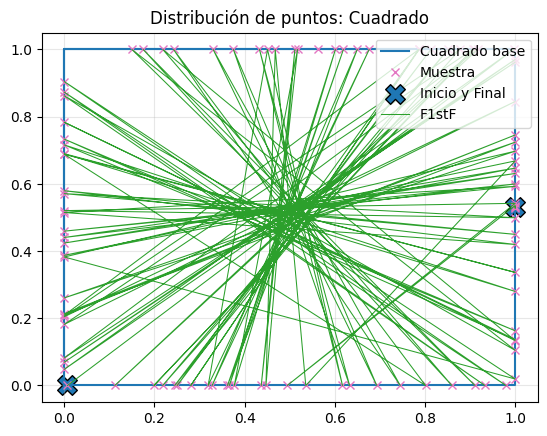

In [4]:
fig, ax = plt.subplots()
ax.plot(cuad_x, cuad_y, color = 'tab:blue', label = 'Cuadrado base')
ax.plot(full_x, full_y, 'x', color = 'tab:pink', label = 'Muestra')
ax.scatter([fft_x[-1], fft_x[0]], [fft_y[-1], fft_y[0]], marker = 'X', s=200, edgecolors = 'black', linewidths = 1, label = 'Inicio y Final')
ax.plot(fft_x, fft_y, color = 'tab:green', label = 'F1stF', linewidth = 0.75)
ax.grid(True, alpha = 0.3)
ax.legend(loc = 'upper right')
ax.set_title('Distribución de puntos: Cuadrado')
plt.show()

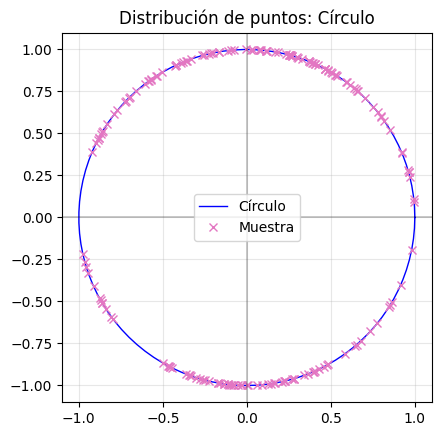

In [5]:
# Puntos sobre la bola.
bola = []
while len(bola) < 180:
    p = np.random.rand()
    p1 = np.random.rand()
    if p > 0.5:
        x = np.random.rand()
    else:
        x = -np.random.rand()
    y = math.sqrt(1 - (x**2))
    if p1 > 0.5:
        y = -y
    bola.append([x,y])

b_x = [_[0] for _ in bola]
b_y = [_[1] for _ in bola]

# Graficación de los puntos.
fig, ax = plt.subplots()
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

ax.plot(x, y, 'b-', linewidth=1, label = 'Círculo')
ax.plot(b_x, b_y, 'x', color = 'tab:pink', label = 'Muestra')
ax.set_title('Distribución de puntos: Círculo')

ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.3)
ax.axvline(x=0, color='k', linewidth=0.3)
ax.legend()
plt.show()

In [6]:
fft_circle = farthest_first_traversal(bola)
print(len(fft_circle))
circle_x = [_[0] for _ in fft_circle]
circle_y = [_[1] for _ in fft_circle]

179


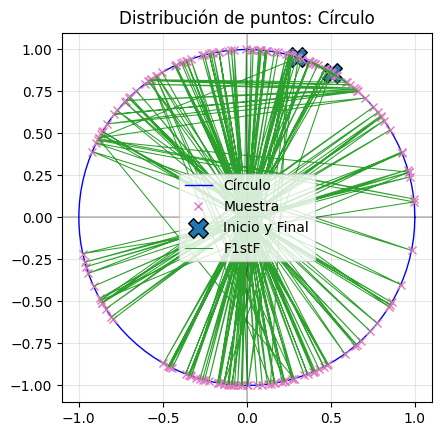

In [7]:
fig, ax = plt.subplots()
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

ax.plot(x, y, 'b-', linewidth=1, label = 'Círculo')
ax.plot(b_x, b_y, 'x', color = 'tab:pink', label = 'Muestra')
ax.scatter([circle_x[-1], circle_x[0]], [circle_y[-1], circle_y[0]], marker = 'X', s=200, edgecolors = 'black', linewidths = 1, label = 'Inicio y Final')
ax.plot(circle_x, circle_y, color = 'tab:green', label = 'F1stF', linewidth = 0.75)
ax.set_title('Distribución de puntos: Círculo')

ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.3)
ax.axvline(x=0, color='k', linewidth=0.3)
ax.legend()
plt.show()

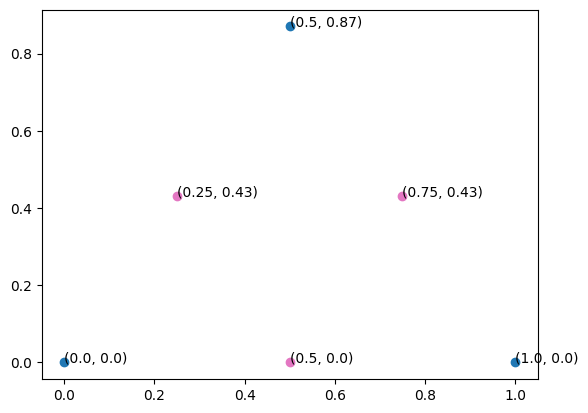

In [49]:
def get_middle_point(x1,y1,x2,y2):
    x = round((x1+x2)/2, 2)
    y = round((y1+y2)/2, 2)
    return x, y

puntos_x = [0.0,0.5,1.0]
puntos_y = [0.0, round(math.sqrt(0.75), 2), 0.0]
zipped_points = zip(puntos_x, puntos_y)
zipped = [_ for _ in zipped_points]

new_x = []
new_y = []

for i in range(len(puntos_x)):
    for j in range(i, len(puntos_x)):
        x, y = get_middle_point(puntos_x[i], puntos_y[i], puntos_x[j], puntos_y[j])
        if (x,y) not in zipped:
            new_x.append(x)
            new_y.append(y)

fig, ax = plt.subplots()
ax.scatter(puntos_x, puntos_y, color = 'tab:blue')
for i in range(len(puntos_x)):
    ax.annotate('({}, {})'.format(puntos_x[i], puntos_y[i]), (puntos_x[i], puntos_y[i]))
ax.scatter(new_x, new_y, color = 'tab:pink')
for i in range(len(new_x)):
    ax.annotate('({}, {})'.format(new_x[i], new_y[i]), (new_x[i], new_y[i]))
plt.show()

In [ ]:
degrees = 5
puntos_x = [0.0,0.5,1.0]
puntos_y = [0.0, round(math.sqrt(0.75), 2), 0.0]

for i in range(degree):
    new_x, new_y = [], []
    zipped_points = zip(puntos_x, puntos_y)
    zipped = [_ for _ in zipped_points]
    for i in range(len(puntos_x)):
        for j in range(i, len(puntos_x)):
            x,y = get_middle_point(puntos_x[i], puntos_y[i], puntos_x[j], puntos_y[j])